In [177]:
#############################
# Exploratory data analysis #
#############################
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read cleaned train data:
df_cleaned = pd.read_csv('stroke_train_cleaned.csv')
# Remove unnamed column:
df_cleaned = df_cleaned.drop(['Unnamed: 0'], axis=1)

# Check dataframe info.:
df_cleaned.info()
# Check number of missing values:
df_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42512 entries, 0 to 42511
Data columns (total 12 columns):
id                   42512 non-null int64
gender               42512 non-null object
age                  42512 non-null float64
hypertension         42512 non-null object
heart_disease        42512 non-null object
ever_married         42512 non-null object
work_type            42512 non-null object
Residence_type       42512 non-null object
avg_glucose_level    42512 non-null float64
bmi                  42512 non-null float64
smoking_status       42512 non-null object
stroke               42512 non-null int64
dtypes: float64(3), int64(2), object(7)
memory usage: 3.9+ MB


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [178]:
# Compute summary stat.: post-data cleansing 
df_summary_post = df_cleaned.describe().T
# Reorder columns order in summary dataframe
df_summary_post = df_summary_post[['count','min','max','mean','25%','50%','75%','std']]
# drop non-numerical and meaningless features
df_summary_post = df_summary_post.drop(['id','stroke'])
df_summary_post

,count,min,max,mean,25%,50%,75%,std
age,42512.0,0.08,82.00,42.152959,24.0000,44.000,60.0000,22.655211
avg_glucose_level,42512.0,55.00,291.05,104.066140,77.4975,91.485,111.7225,42.639886
bmi,42512.0,10.10,47.40,28.056657,23.3000,27.600,32.2000,6.774594


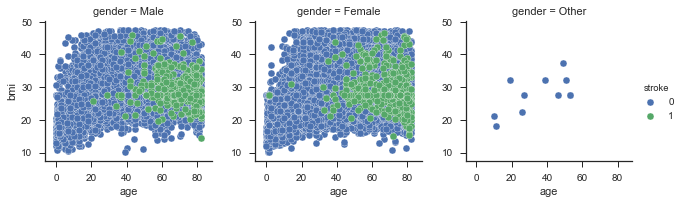

In [179]:
# Q1. Count frequencies and shows patients breakdown by stroke condition:
df_group_stroke = pd.DataFrame(df_cleaned.groupby('stroke')['stroke'].count())
df_group_stroke.columns = ['count']
plt.pie(df_group_stroke, labels=['No Stroke','Stroke'], autopct='%.0f%%', colors=['green','red'], shadow=True)
plt.title('Pie chart on patients breakdown by stroke condition')
plt.show()

In [180]:
# Count frequencies: demographic factors on a stroke condition
df_cleaned.groupby(['stroke','gender'])['gender'].count().sort_values(ascending=False) 

stroke  gender
0       Female    24597
        Male      17132
1       Female      425
        Male        347
0       Other        11
Name: gender, dtype: int64

In [181]:
df_cleaned.groupby(['stroke','ever_married'])['ever_married'].count().sort_values(ascending=False)

stroke  ever_married
0       Yes             26551
        No              15189
1       Yes               693
        No                 79
Name: ever_married, dtype: int64

In [182]:
df_cleaned.groupby(['stroke','Residence_type'])['Residence_type'].count().sort_values(ascending=False)

stroke  Residence_type
0       Urban             20941
        Rural             20799
1       Urban               394
        Rural               378
Name: Residence_type, dtype: int64

In [183]:
df_cleaned.groupby(['stroke','work_type'])['work_type'].count().sort_values(ascending=False)

stroke  work_type    
0       Private          23806
        Self-employed     6404
        children          6147
        Govt_job          5208
1       Private            432
        Self-employed      250
0       Never_worked       175
1       Govt_job            88
        children             2
Name: work_type, dtype: int64

In [184]:
# Count frequencies: health indiator factors on a stroke condition
df_cleaned.groupby(['stroke','smoking_status'])['smoking_status'].count().sort_values(ascending=False)

stroke  smoking_status 
0       never smoked       28372
        formerly smoked     7076
        smokes              6292
1       never smoked         422
        formerly smoked      219
        smokes               131
Name: smoking_status, dtype: int64

In [185]:
df_cleaned.groupby(['stroke','hypertension'])['hypertension'].count().sort_values(ascending=False)

stroke  hypertension
0       No              38036
        Yes              3704
1       No                575
        Yes               197
Name: hypertension, dtype: int64

In [186]:
df_cleaned.groupby(['stroke','heart_disease'])['heart_disease'].count().sort_values(ascending=False)

stroke  heart_disease
0       No               39886
        Yes               1854
1       No                 599
        Yes                173
Name: heart_disease, dtype: int64

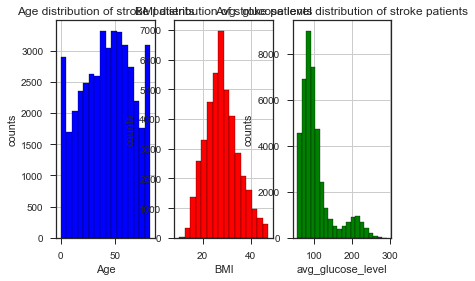

In [187]:
# Histogram: age
plt.subplot(1,3,1)
df_cleaned['age'].hist(bins=16, facecolor = 'blue', edgecolor='black')
plt.title('Age distribution of stroke patients')
plt.xlabel('Age')
plt.ylabel('counts')

# Histogram: bmi
plt.subplot(1,3,2)
df_cleaned['bmi'].hist(bins=16, facecolor = 'red', edgecolor='black')
plt.title('BMI distribution of stroke patients')
plt.xlabel('BMI')
plt.ylabel('counts')

# Histogram: avg_glucose_level
plt.subplot(1,3,3)
df_cleaned['avg_glucose_level'].hist(bins=20, facecolor = 'green', edgecolor='black')
plt.title('Avg. glucose level distribution of stroke patients')
plt.xlabel('avg_glucose_level')
plt.ylabel('counts')
plt.show()

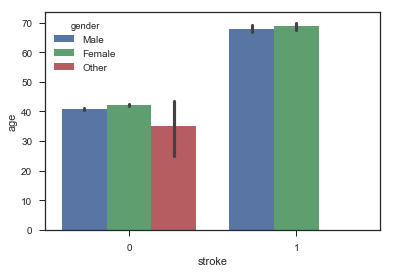

In [188]:
# Visualize categorical data #
###############################################################################
# Column charts: age of stroke patient by lifestyle factors
sns.barplot(x='stroke',y='age',hue='gender', data=df_cleaned)
plt.show()

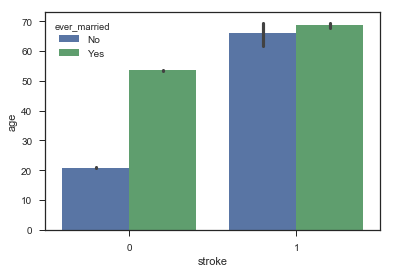

In [189]:
sns.barplot(x='stroke',y='age',hue='ever_married', data=df_cleaned)
plt.show()

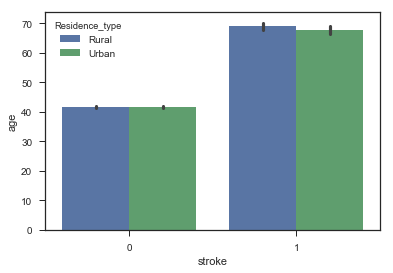

In [190]:
sns.barplot(x='stroke',y='age',hue='Residence_type', data=df_cleaned)
plt.show()

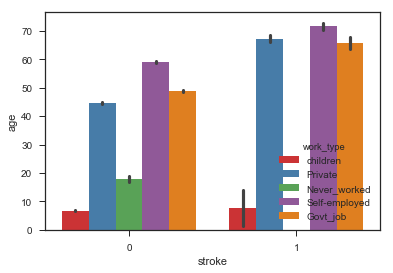

In [191]:
sns.barplot(x='stroke',y='age',hue='work_type', data=df_cleaned, palette="Set1")
plt.show()

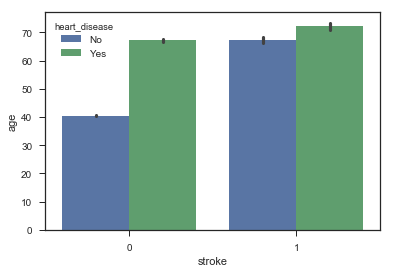

In [192]:
# Column charts: age of stroke patient by health indicator factors
sns.barplot(x='stroke',y='age',hue='heart_disease', data=df_cleaned)
plt.show()

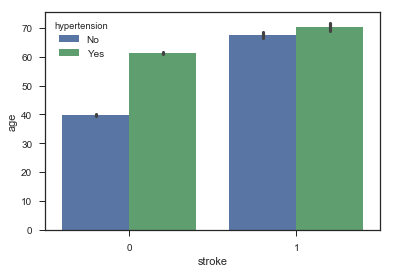

In [193]:
sns.barplot(x='stroke',y='age',hue='hypertension', data=df_cleaned)
plt.show()

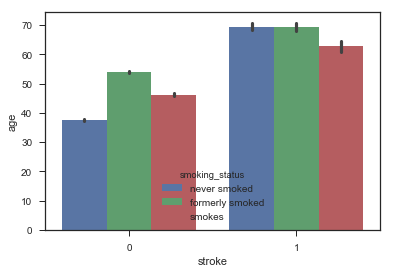

In [194]:
sns.barplot(x='stroke',y='age',hue='smoking_status', data=df_cleaned)
plt.show()

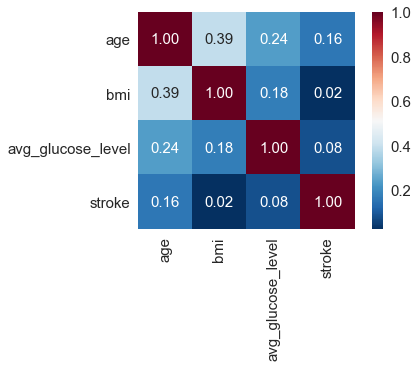

In [195]:
# Correlation Matrix Plot #
###############################################################################
# Column names of cleaned dataframe
cols = ['age','bmi','avg_glucose_level','stroke']

# Plot correlation matrix heatmap
cm = np.corrcoef(df_cleaned[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, cmap='RdBu_r', cbar=True,
                 annot=True, square=True, fmt='.2f',
                 annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

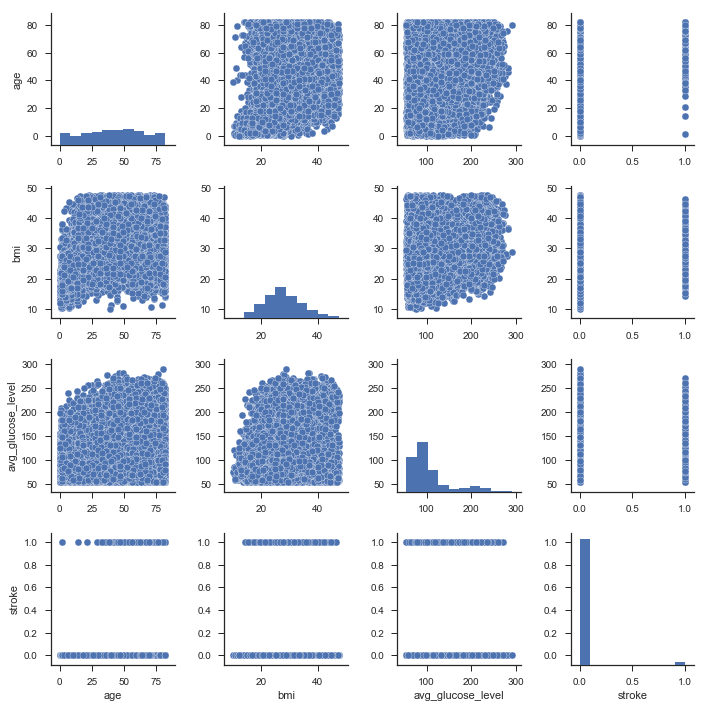

In [196]:
# Scatter Plot #
###############################################################################
# Pairwise scatter plot
sns.set(style='ticks', color_codes=True)
sns.pairplot(df_cleaned[cols])
plt.show()

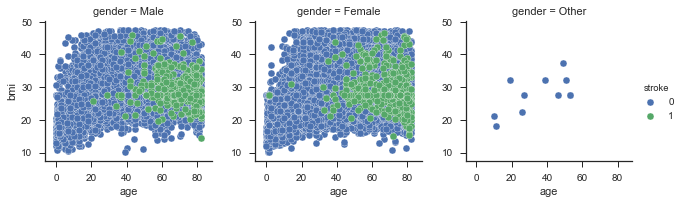

In [201]:
# Scatter Plot: bmi vs. age faceted by stroke
s1 = sns.FacetGrid(df_cleaned, col='gender', hue='stroke')
s1 = (s1.map(plt.scatter, 'age', 'bmi', edgecolor='white').add_legend())
plt.show()

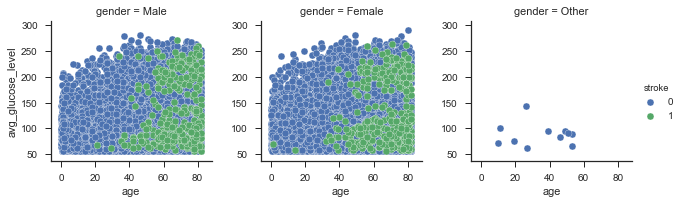

In [200]:
# Scatter Plot: avg_glucose_level vs. age faceted by stroke
s2 = sns.FacetGrid(df_cleaned, col='gender', hue='stroke')
s2 = (s2.map(plt.scatter, 'age', 'avg_glucose_level', edgecolor='white').add_legend())
plt.show()